In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [2]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [3]:
dataset = pd.read_csv("SeoulBikeData.csv", na_values="?", engine="python")
dataset

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [5]:
dataset = dataset.dropna()
dataset = dataset.iloc[:500,1:7]
dataset

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m)
0,254,0,-5.2,37,2.2,2000
1,204,1,-5.5,38,0.8,2000
2,173,2,-6.0,39,1.0,2000
3,107,3,-6.2,40,0.9,2000
4,78,4,-6.0,36,2.3,2000
...,...,...,...,...,...,...
495,316,15,4.4,46,1.4,1113
496,301,16,4.1,51,1.8,1112
497,366,17,2.9,60,1.3,1193
498,531,18,1.7,64,1.3,1140


In [6]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

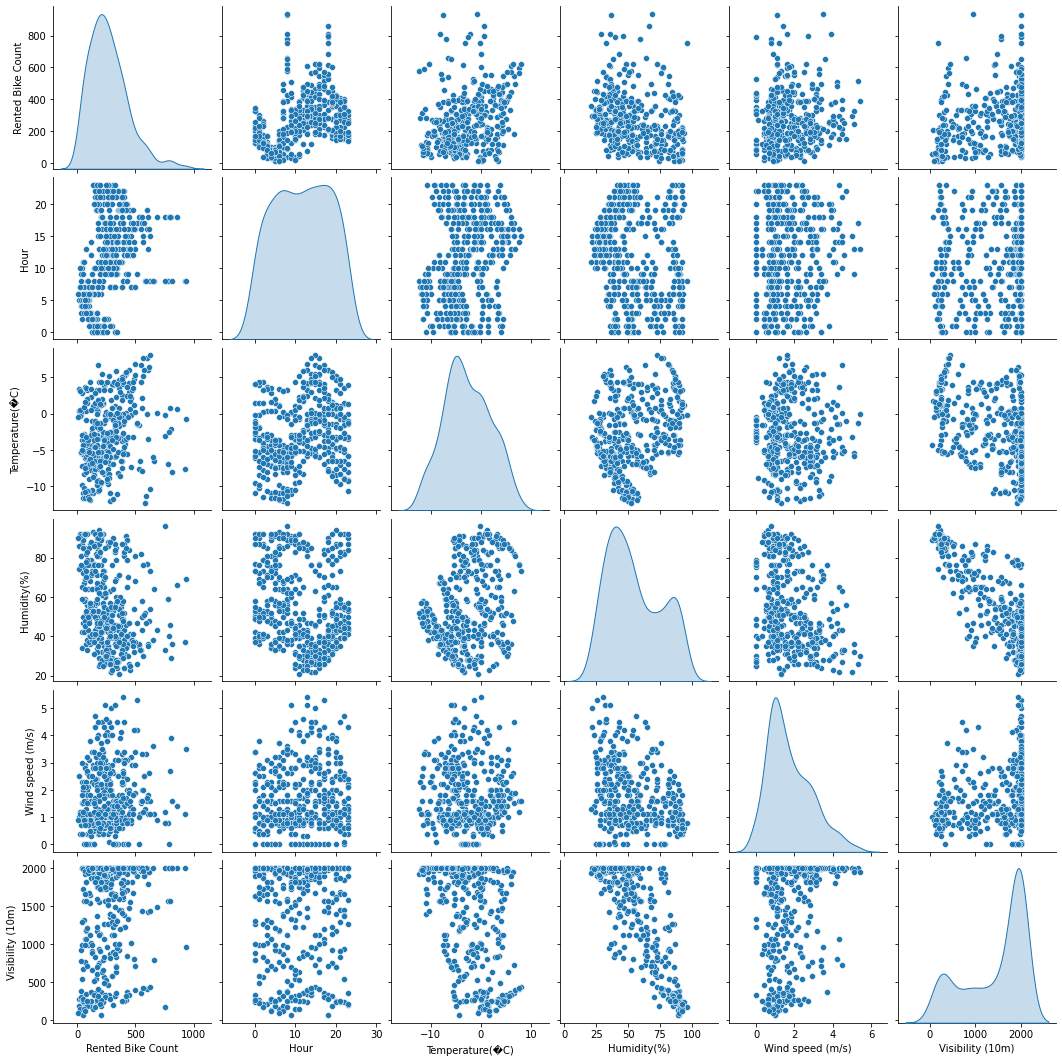

In [7]:
sns.pairplot(train_dataset,diag_kind="kde")
plt.show()

In [9]:
train_stats = train_dataset.describe()
train_stats.pop("Rented Bike Count")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Hour,400.0,11.65250,6.821516,0.0,6.0,12.0,18.00,23.0
Temperature(�C),400.0,-2.72675,4.574251,-12.3,-5.9,-3.3,0.60,8.0
Humidity(%),400.0,54.57000,20.560568,21.0,38.0,50.0,71.25,96.0
Wind speed (m/s),400.0,1.75200,1.146771,0.0,0.9,1.5,2.50,5.4
Visibility (10m),400.0,1430.22250,665.126395,59.0,891.5,1791.5,2000.00,2000.0


In [10]:
train_labels = train_dataset.pop("Rented Bike Count")
test_labels = test_dataset.pop("Rented Bike Count")

In [16]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data
normed_test_data

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m)
9,-0.388843,-0.824889,-1.340916,-1.091761,0.748395
25,-1.561603,0.115155,1.528654,-1.004560,-0.661863
28,-1.121818,-0.234629,1.188197,0.216259,-0.395748
31,-0.682033,-0.365798,1.285470,0.652266,-0.231869
32,-0.535438,-0.322075,1.188197,0.303461,0.008686
...,...,...,...,...,...
472,0.637322,0.486801,-0.319544,-0.568553,0.438680
482,-1.415008,0.115155,1.625928,-0.306949,-1.627093
483,-1.268413,-0.037875,1.674565,-0.394150,-1.717301
486,-0.828628,-0.453244,1.771838,-0.568553,-1.750378


In [12]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [13]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [14]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 2.3495230e-01],
       [ 3.0420589e-01],
       [ 3.3330676e-01],
       [ 1.2965009e-01],
       [-1.1688462e-01],
       [ 1.4320126e-01],
       [-1.3138726e-04],
       [-3.1253815e-01],
       [ 1.7793347e-01],
       [-2.3210615e-01]], dtype=float32)

In [ ]:
EPOCHS = 5000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:18942.5957,  mae:98.0903,  mse:18942.5957,  val_loss:19777.3496,  val_mae:89.8760,  val_mse:19777.3496,  
....................................................................................................
Epoch: 100, loss:18230.2383,  mae:95.8586,  mse:18230.2383,  val_loss:19256.0586,  val_mae:88.0464,  val_mse:19256.0586,  
....................................................................................................
Epoch: 200, loss:17303.5547,  mae:92.6967,  mse:17303.5547,  val_loss:18743.0840,  val_mae:86.1407,  val_mse:18743.0840,  
....................................................................................................
Epoch: 300, loss:16334.8223,  mae:90.4524,  mse:16334.8223,  val_loss:18101.5117,  val_mae:86.2896,  val_mse:18101.5117,  
....................................................................................................
Epoch: 400, loss:15297.1465,  mae:88.3035,  mse:15297.1465,  val_loss:17499.5195,  val_mae:86.4954,  val_

....................................................................................................
Epoch: 3700, loss:1796.7766,  mae:26.2639,  mse:1796.7766,  val_loss:17866.5117,  val_mae:99.7301,  val_mse:17866.5117,  
....................................................................................................
Epoch: 3800, loss:1634.9631,  mae:24.9594,  mse:1634.9631,  val_loss:18174.5840,  val_mae:99.1727,  val_mse:18174.5840,  
....................................................................................................
Epoch: 3900, loss:1611.3688,  mae:25.5087,  mse:1611.3688,  val_loss:18414.7266,  val_mae:100.5814,  val_mse:18414.7266,  
....................................................................................................
Epoch: 4000, loss:1550.1066,  mae:24.9086,  mse:1550.1066,  val_loss:18400.2852,  val_mae:100.3344,  val_mse:18400.2852,  
....................................................................................................
Epoch

Text(0, 0.5, 'MSE [Rented Bike Count]')

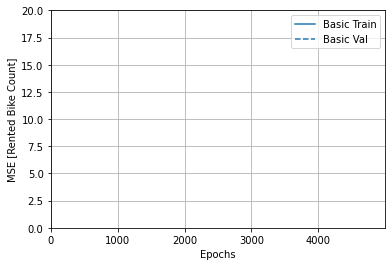

In [15]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [Rented Bike Count]')